In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Path to the CSV file
file_path = r"C:\Users\Arzoo\Downloads\uber_nyc_2023.csv"

In [3]:
# Read the CSV file
df = pd.read_csv(file_path)
print(df.head())

   DOLocationID  PULocationID hvfhs_license_num         request_datetime  \
0           145           223            HV0003  2023-01-01T00:50:41.000   
1           151           236            HV0003  2023-01-01T00:48:34.000   
2            78            60            HV0003  2023-01-01T00:27:48.000   
3            95           175            HV0003  2023-01-01T00:51:30.000   
4           182           198            HV0003  2023-01-01T00:28:43.000   

   trip_miles  trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
0        3.83       1131                18.74   0.00  0.56       1.66   
1        1.84        645                16.64   0.00  0.50       1.48   
2        1.75        633                24.23   0.00  0.73       2.15   
3        7.13        797                21.03   0.00  0.63       1.87   
4       14.07       1848                55.87   6.55  1.87       5.54   

   congestion_surcharge  airport_fee  tips  driver_pay        date  PUBorough  \
0                  0.00

In [4]:
df.index = pd.to_datetime(df.date)

In [5]:
df.head()

,DOLocationID,PULocationID,hvfhs_license_num,request_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,date,PUBorough,PUZone,DOBorough,DOZone
date,,,,,,,,,,,,,,,,,,,
2023-01-01,145,223,HV0003,2023-01-01T00:50:41.000,3.83,1131,18.74,0.00,0.56,1.66,0.00,0.0,0.00,17.55,2023-01-01,Queens,Steinway,Queens,Long Island City/Hunters Point
2023-01-01,151,236,HV0003,2023-01-01T00:48:34.000,1.84,645,16.64,0.00,0.50,1.48,2.75,0.0,3.09,13.75,2023-01-01,Manhattan,Upper East Side North,Manhattan,Manhattan Valley
2023-01-01,78,60,HV0003,2023-01-01T00:27:48.000,1.75,633,24.23,0.00,0.73,2.15,0.00,0.0,0.00,13.92,2023-01-01,Bronx,Crotona Park East,Bronx,East Tremont
2023-01-01,95,175,HV0003,2023-01-01T00:51:30.000,7.13,797,21.03,0.00,0.63,1.87,0.00,0.0,4.70,15.98,2023-01-01,Queens,Oakland Gardens,Queens,Forest Hills
2023-01-01,182,198,HV0003,2023-01-01T00:28:43.000,14.07,1848,55.87,6.55,1.87,5.54,0.00,0.0,6.98,38.79,2023-01-01,Queens,Ridgewood,Bronx,Parkchester


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Path to the directory
image_dir = 'C:\\Users\\Arzoo\\Desktop\\PROJECT 4\\NYC-Taxis\\image_folder_lr_kmeans'

In [8]:
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

In [9]:
df = df.sort_index()

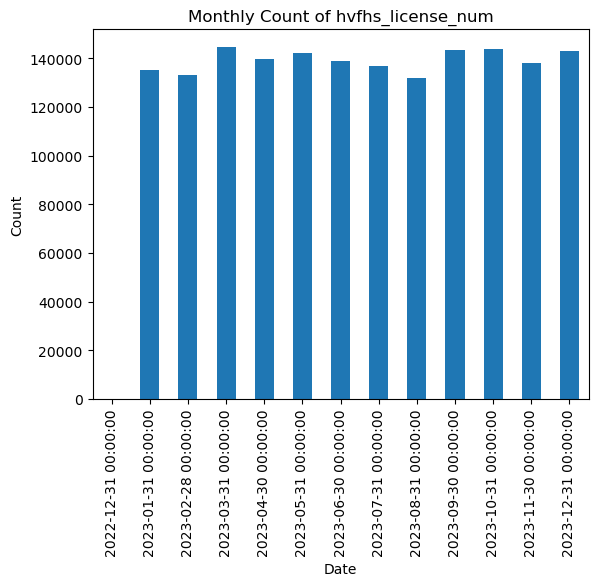

In [10]:
# Monthly uber count bar plot
df.resample("M")["hvfhs_license_num"].count().plot(kind="bar")
plt.title('Monthly Count of hvfhs_license_num')
plt.xlabel('Date')
plt.ylabel('Count')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'Monthly Count of hvfhs_license_num.png'))  

# Display the plot
plt.show()

In [11]:
# The number of available uber remained relatively stable each month, with minor fluctuations throughout the year

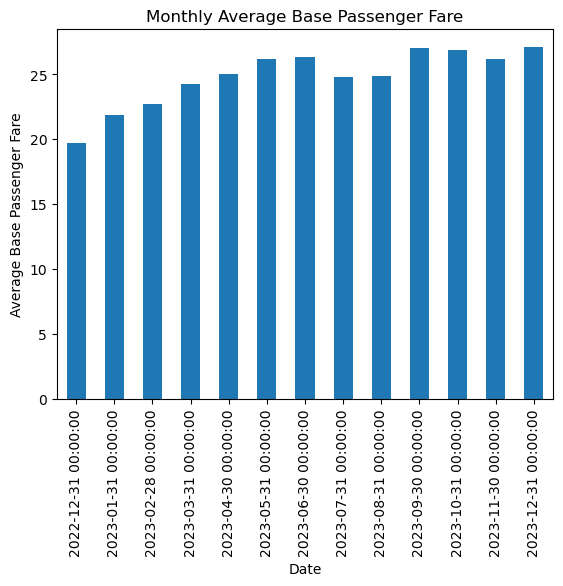

In [12]:
# Monthly Average Base Passenger Fare Bar Plot
df.resample("M")["base_passenger_fare"].mean().plot(kind="bar")
plt.xlabel("Date")
plt.ylabel("Average Base Passenger Fare")
plt.title("Monthly Average Base Passenger Fare")

# Save the plot
plt.savefig(os.path.join(image_dir, 'Monthly Average Base Passenger Fare.png')) 

# Display the plot
plt.show()

In [13]:
# A gradual increase in the average base passenger fare each month throughout the year.
# Despite the stable availability of Uber, the base passenger fare increased over time.
# The comparison suggests that fare pricing may have been influences by factors other than uber availability such as demand or operating costs.

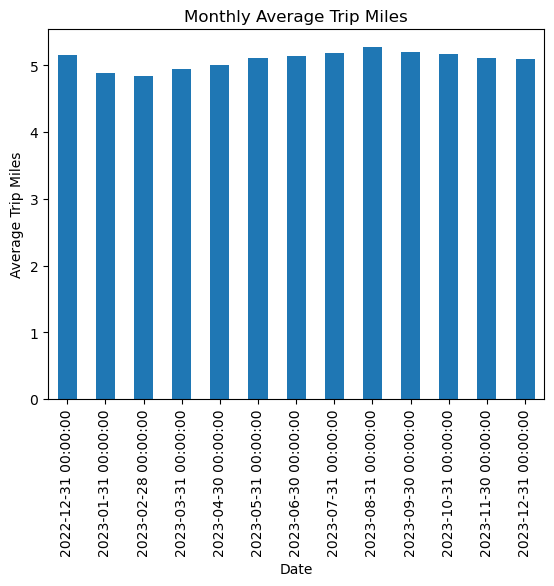

In [14]:
# Monthly Average Trip Miles Bar Plot
df.resample("M")["trip_miles"].mean().plot(kind="bar")
plt.xlabel("Date")
plt.ylabel("Average Trip Miles")
plt.title("Monthly Average Trip Miles")

# Save the plot 
plt.savefig(os.path.join(image_dir, 'monthly_avg_trip_miles.png'))

# Display the plot
plt.show()

In [15]:
# The average trip miles remained relatively stable throughout the year. 
# The distance of trips stayed consistent, the base passenger fare increased, indicating a rise in pricing that isn't related to trip length or uber availability.

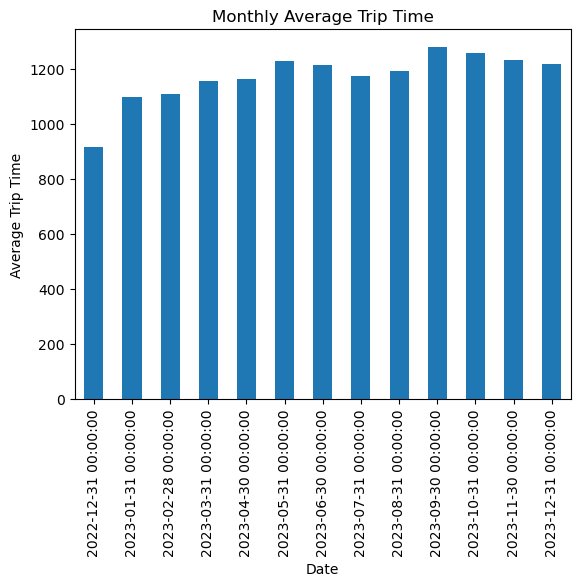

In [16]:
# Monthly Avg Trip Time Bar Plot
df.resample("M")["trip_time"].mean().plot(kind="bar")

# Set titles and labels (optional)
plt.xlabel("Date")
plt.ylabel("Average Trip Time")
plt.title("Monthly Average Trip Time")

# Save the plot 
plt.savefig(os.path.join(image_dir, 'Monthly Avg Trip Time.png'))

# Display the plot
plt.show()

In [17]:
# A slight increase in the average trip time over the year
# Despite stable vehicle availability and consitent trip distance, the trip time has slightly increased.
# The rise in base passenger fare may be linked to longer trip durations rather than just distance.

In [18]:
df.tail()

,DOLocationID,PULocationID,hvfhs_license_num,request_datetime,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,date,PUBorough,PUZone,DOBorough,DOZone
date,,,,,,,,,,,,,,,,,,,
2023-12-31,11,11,HV0003,2023-12-31T13:23:34.000,1.18,529,8.87,0.0,0.24,0.79,0.00,0.0,0.0,8.01,2023-12-31,Brooklyn,Bath Beach,Brooklyn,Bath Beach
2023-12-31,74,136,HV0003,2023-12-31T13:09:48.000,6.27,1002,22.38,0.0,0.62,1.99,0.00,0.0,0.0,17.66,2023-12-31,Bronx,Kingsbridge Heights,Manhattan,East Harlem North
2023-12-31,167,159,HV0003,2023-12-31T13:36:22.000,1.86,546,10.68,0.0,0.29,0.95,0.00,0.0,0.0,7.57,2023-12-31,Bronx,Melrose South,Bronx,Morrisania/Melrose
2023-12-31,34,76,HV0003,2023-12-31T13:53:57.000,8.18,2273,34.85,0.0,0.96,3.09,0.00,0.0,0.0,32.11,2023-12-31,Brooklyn,East New York,Brooklyn,Brooklyn Navy Yard
2023-12-31,230,88,HV0003,2023-12-31T13:08:20.000,6.07,1110,28.85,0.0,0.79,2.56,2.75,0.0,0.0,18.41,2023-12-31,Manhattan,Financial District South,Manhattan,Times Sq/Theatre District


In [19]:
# summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1670353 entries, 2022-12-31 to 2023-12-31
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   DOLocationID          1670353 non-null  int64  
 1   PULocationID          1670353 non-null  int64  
 2   hvfhs_license_num     1670353 non-null  object 
 3   request_datetime      1670353 non-null  object 
 4   trip_miles            1670353 non-null  float64
 5   trip_time             1670353 non-null  int64  
 6   base_passenger_fare   1670353 non-null  float64
 7   tolls                 1670353 non-null  float64
 8   bcf                   1670353 non-null  float64
 9   sales_tax             1670353 non-null  float64
 10  congestion_surcharge  1670353 non-null  float64
 11  airport_fee           1670353 non-null  float64
 12  tips                  1670353 non-null  float64
 13  driver_pay            1670353 non-null  float64
 14  date               

In [20]:
# number of rows and columns
df.shape

(1670353, 19)

In [21]:
# column names
df.columns

Index(['DOLocationID', 'PULocationID', 'hvfhs_license_num', 'request_datetime',
       'trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf',
       'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips',
       'driver_pay', 'date', 'PUBorough', 'PUZone', 'DOBorough', 'DOZone'],
      dtype='object')

In [22]:
# statistical summary
df.describe()

,DOLocationID,PULocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06,1.670353e+06
mean,1.431584e+02,1.397859e+02,5.077845e+00,1.194009e+03,2.527713e+01,1.145354e+00,7.646210e-01,2.129438e+00,1.128741e+00,2.028800e-01,1.144865e+00,1.984765e+01
std,7.762604e+01,7.462738e+01,5.968473e+00,8.628934e+02,2.192293e+01,3.966119e+00,6.991973e-01,1.783831e+00,1.346479e+00,6.847761e-01,3.297674e+00,1.700355e+01
min,1.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,-6.697000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.655000e+01
25%,7.600000e+01,7.600000e+01,1.570000e+00,5.970000e+02,1.183000e+01,0.000000e+00,3.400000e-01,1.020000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.920000e+00
50%,1.420000e+02,1.410000e+02,2.980000e+00,9.650000e+02,1.891000e+01,0.000000e+00,5.500000e-01,1.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.484000e+01
75%,2.190000e+02,2.110000e+02,6.310000e+00,1.535000e+03,3.063000e+01,0.000000e+00,9.200000e-01,2.640000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.486000e+01
max,2.650000e+02,2.650000e+02,3.674500e+02,3.133800e+04,2.193960e+03,9.957000e+01,6.191000e+01,7.453000e+01,5.500000e+00,5.000000e+00,1.474200e+02,2.737580e+03


In [23]:
# Check the data types of each column
df.dtypes

DOLocationID              int64
PULocationID              int64
hvfhs_license_num        object
request_datetime         object
trip_miles              float64
trip_time                 int64
base_passenger_fare     float64
tolls                   float64
bcf                     float64
sales_tax               float64
congestion_surcharge    float64
airport_fee             float64
tips                    float64
driver_pay              float64
date                     object
PUBorough                object
PUZone                   object
DOBorough                object
DOZone                   object
dtype: object

In [24]:
# Check for missing values
df.isnull().sum()

DOLocationID                0
PULocationID                0
hvfhs_license_num           0
request_datetime            0
trip_miles                  0
trip_time                   0
base_passenger_fare         0
tolls                       0
bcf                         0
sales_tax                   0
congestion_surcharge        0
airport_fee                 0
tips                        0
driver_pay                  0
date                        0
PUBorough                  64
PUZone                      0
DOBorough               67615
DOZone                      0
dtype: int64

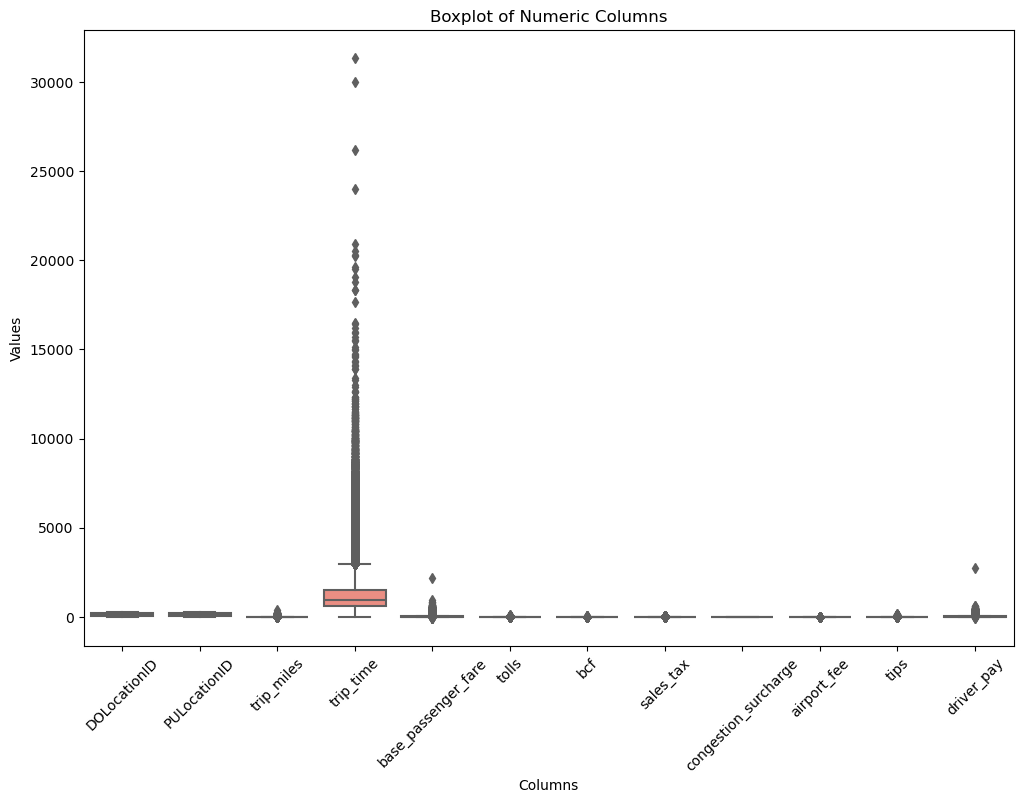

In [25]:
numeric_df = df.select_dtypes(include=[float, int])

# Boxplot for the numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, palette="Set3")
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'numeric_columns_boxplot.png'))

# Display the plot
plt.show()

In [26]:
# The boxplot reveals that trip_time has a significantly higher range and more outliers compared to other numeric columns, indicating considerable variability in trip durations.

In [27]:
# Converting trip time from seconds to minutes
# Calculating the % trips with a duration of more than 100 minutes
(len(numeric_df[numeric_df['trip_time'].apply(lambda x : x/60) > 100]) / len(numeric_df)) * 100

0.15002816769868405

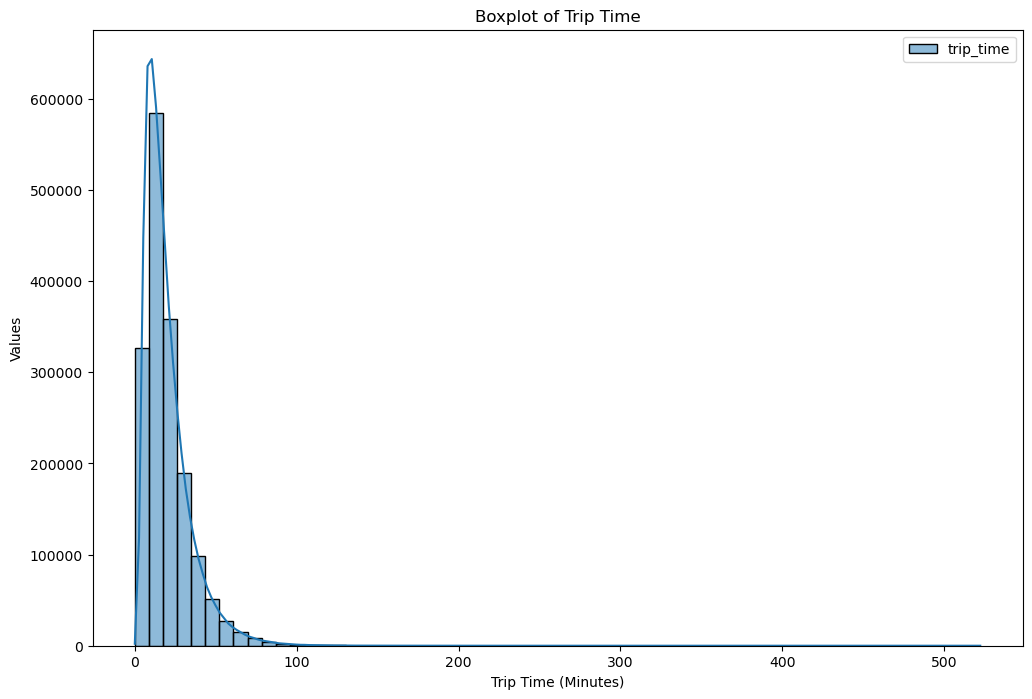

In [28]:
# Boxplot 'trip_time' 
plt.figure(figsize=(12, 8))  
sns.histplot(data=numeric_df[['trip_time']].apply(lambda x : x/60), kde=True, bins=60)
plt.title('Boxplot of Trip Time')
plt.xlabel('Trip Time (Minutes)')
plt.ylabel('Values')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'boxplot_trip_time.png'))

# Display the plot
plt.show()

In [29]:
# The distribution of trip times is highly skewed to the right, with most trips lasting less than 50 minutes.

In [30]:
numeric_df["congestion_surcharge"].value_counts()

congestion_surcharge
0.00    970241
2.75    679867
0.75     20119
5.50       121
1.50         5
Name: count, dtype: int64

In [31]:
numeric_df[["trip_time","tips"]].corr()

,trip_time,tips
trip_time,1.000000,0.292672
tips,0.292672,1.000000


In [32]:
# There is a weak positive correlation (0.29) between trip time and tips, suggesting that longer trips tend to receive slightly higher tips.

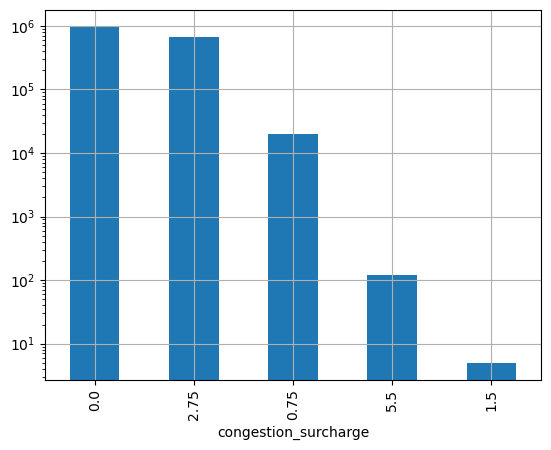

In [33]:
# Bar chart - congestion_surcharge
numeric_df["congestion_surcharge"].value_counts().plot(kind="bar")

# Set y-axis to logarithmic scale 
plt.yscale("log")

# Add grid to the plot
plt.grid()

# Save the plot 
plt.savefig(os.path.join(image_dir, 'congestion_surcharge_value_counts.png'))

# Show the plot
plt.show()

In [34]:
# The bar chart shows that the most common congestion surcharge values are 0.0 and 2.75, with significantly fewer occurrences of higher surcharge values.

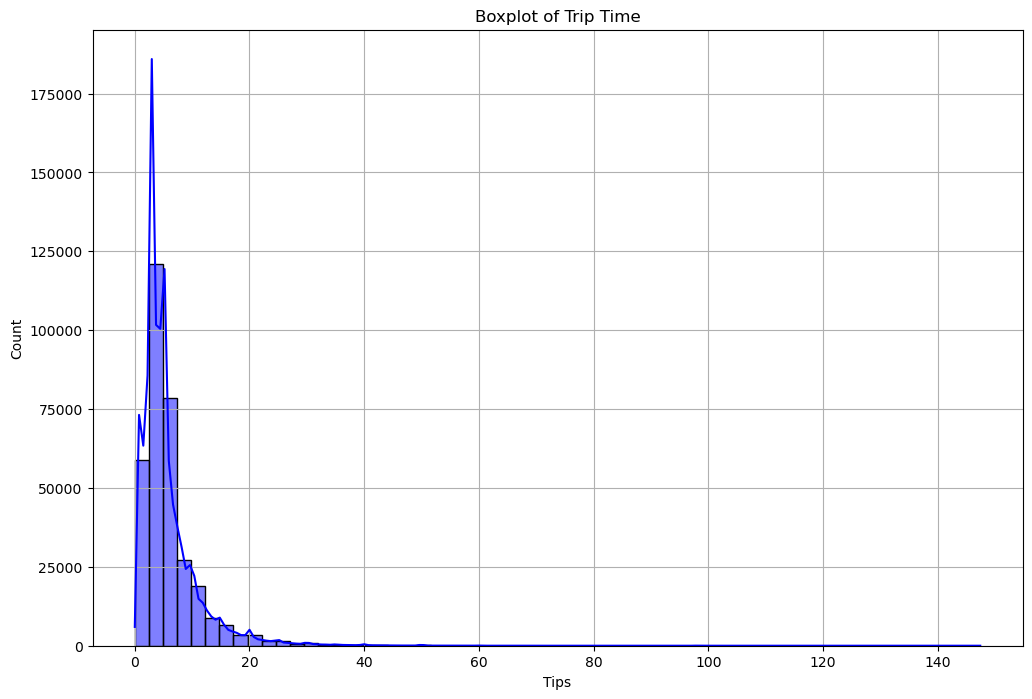

In [35]:
# Boxplot for tips
plt.figure(figsize=(12, 8))  
sns.histplot(numeric_df[numeric_df["tips"] > 0]["tips"], color="blue", kde=True, label=None, bins=60)
plt.title('Boxplot of Trip Time')
plt.xlabel('Tips')
plt.ylabel('Count')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'boxplot_trip_time.png'))

# Display the plot
plt.grid()
plt.show()

In [36]:
# The distribution of tips shows that the majority of tips are concentrated between $0 and $10, with over 175,000 occurrences. Tips exceeding $20 are rare, with very few instances reaching up to $140. This indicates that while most trips result in small tips, a few exceptional cases involve much higher tips.

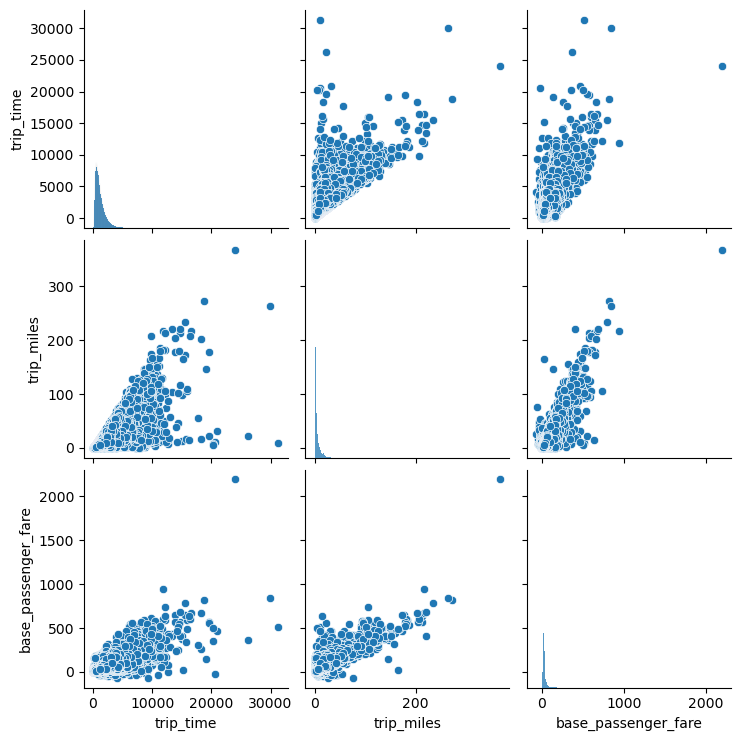

In [37]:
# Correlations between trip time, trip distance, and base passenger fare
pairplot = sns.pairplot(numeric_df[['trip_time', 'trip_miles', 'base_passenger_fare']])

# Save the pairplot 
pairplot.savefig(os.path.join(image_dir, 'pairplot_trip_metrics.png'))

# Display the pairplot
plt.show()

In [38]:
# The pairplot suggest both trip distance and time are significant factors influencing the base passenger fare, with all variables showing positive correlations with one another.

In [39]:
# Correlation between base_passenger_fare and driver_pay
numeric_df[['base_passenger_fare', 'driver_pay']].corr()

,base_passenger_fare,driver_pay
base_passenger_fare,1.000000,0.946026
driver_pay,0.946026,1.000000


In [40]:
# The correlation coefficient of 0.946 quantifies the magnitude of the relationship.
# The correlation between base passenger fare and driver pay is strong but not exactly 1.
# This indicated that while they are closely related, other factors also influence driver pay.
# Variables such as tips, tolls, or additional charges might cause slight variations in the relationship between base passenger fare and driver pay.

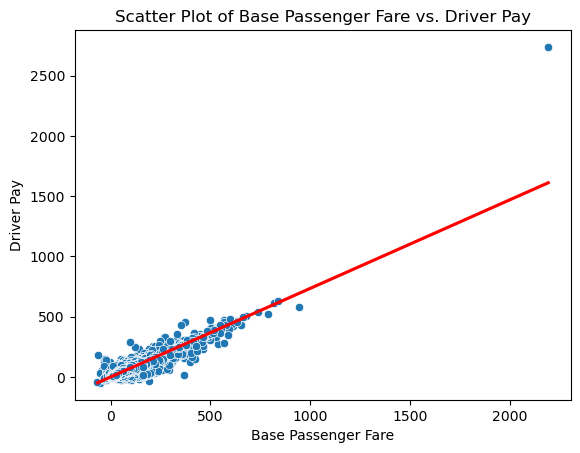

In [41]:
# Scatter plot of the base_passenger_fare vs driver_pay 
sns.scatterplot(x='base_passenger_fare', y='driver_pay', data=numeric_df)
sns.regplot(x='base_passenger_fare', y='driver_pay', data=numeric_df, scatter=False, color='red')
plt.xlabel('Base Passenger Fare')
plt.ylabel('Driver Pay')
plt.title('Scatter Plot of Base Passenger Fare vs. Driver Pay')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'scatter_base_fare_vs_driver_pay.png'))

# Display the plot
plt.show()

In [42]:
# Scatter plot suggests a strong positive relationship between base passenger fare and driver fare, with a consistent trend and a few notable outliers.
# The outliers could be due to entry error or unusual circumstances.

In [43]:
# Negative values (percentage) in driver_pay column 
len(numeric_df[numeric_df['driver_pay'] < 0]) / len(numeric_df) * 100

0.002334835810155099

In [44]:
# Negative values (percentage) in base_passenger_fare column 
len(numeric_df[numeric_df['base_passenger_fare'] < 0]) / len(numeric_df) * 100

0.0402908846213944

In [45]:
# Negative percentage values in passenger fare and driver fare should not be allowed as they are illogical in financial transactions.
# Ensuring database constraints to prevent negative entries is crucial to maintain data integrity and avoid issues in data analysis.

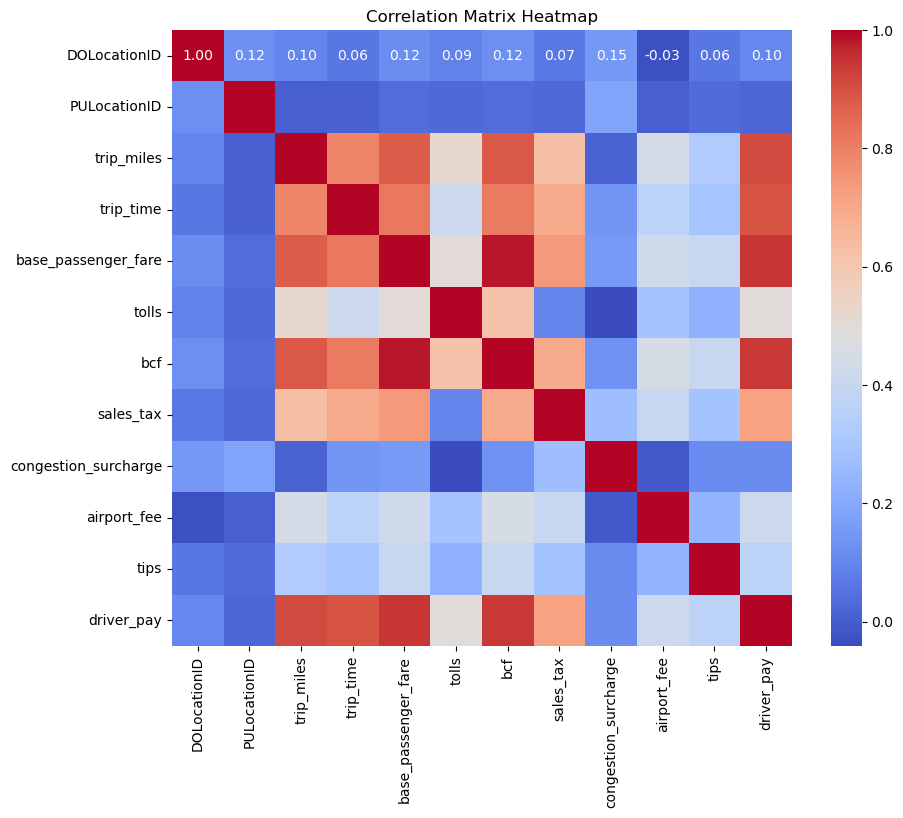

In [46]:
# Correlation matrix heatmap:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')

# Save the heatmap 
plt.savefig(os.path.join(image_dir, 'correlation_matrix_heatmap.png'))

# Display the heatmap
plt.show()

In [47]:
# Strong Correlation: base_passenger_fare and driver_pay; Trip_miles and trip_time are strongly correlated, indicating longer trips yield higher fares.
# Weak Correlation: DOLocationID and PULocationID show minimal impact on other variables, suggesting location IDs are less influential.
# Moderate Correlation: Tolls, sales_tax, and congestion_surcharge moderately correlate with higher fares and driver pay, indicating additional charges influence overall costs.

Mean Squared Error: 113.6686652628165
Mean Absolute Error: 5.522186085277672
R^2 Score: 0.7948680884519195
Sample Size: 334071
                      Coefficient
trip_miles               2.186297
trip_time                0.007589
tolls                    0.333768
congestion_surcharge     1.633050


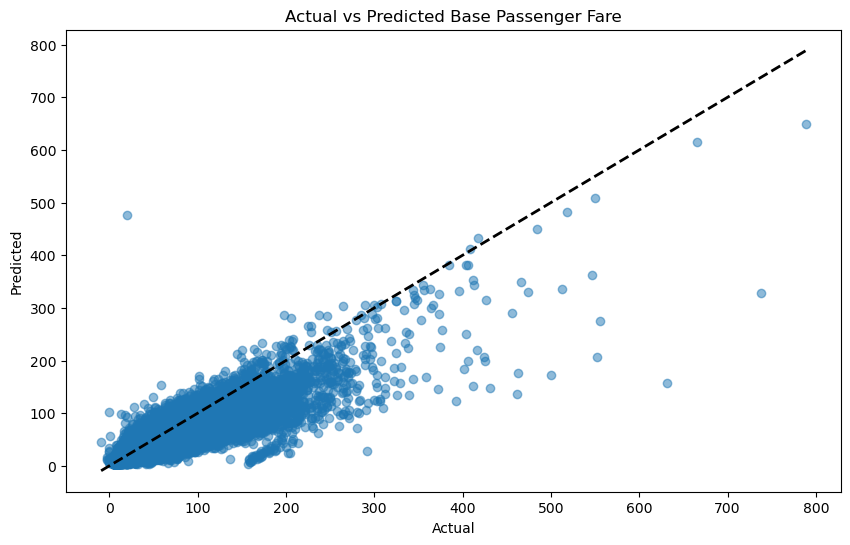

In [48]:
# Regression model to predict base_passenger_fare
# Define the features and target
features = ['trip_miles', 'trip_time', 'tolls', 'congestion_surcharge']
target = 'base_passenger_fare'

# Filter the DataFrame to include only selected features and target
data = df[features + [target]]

# Drop rows with missing values
data = data.dropna()

# Define the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
sample_size = len(y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Sample Size: {sample_size}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Shortening the center line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Base Passenger Fare')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'actual_vs_predicted_base_fare.png'))

# Display the plot
plt.show()

In [49]:
# Predictions closely align with actual values for lower fares.
# Greater error and dispersion observed for higher fare values, indicating reduced accuracy in predicting higher fares.
# Scatter plot shows good alignment near lower values, but increased variance as fare values rise.

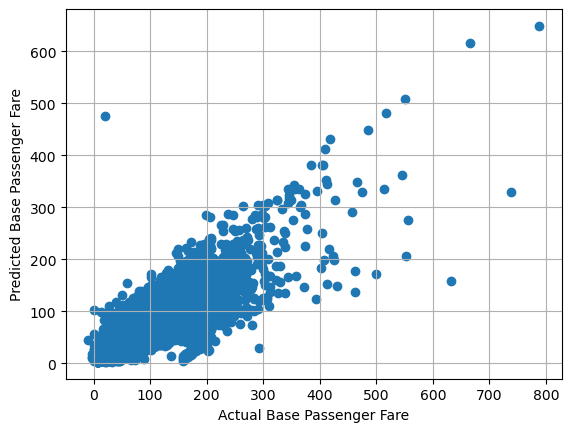

In [50]:
# Scatter plot of Actual vs Predicted Base Passenger Fare
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.scatter(results.Actual, results.Predicted)
plt.xlabel("Actual Base Passenger Fare")
plt.ylabel("Predicted Base Passenger Fare")
plt.grid()

# Save the plot 
plt.savefig(os.path.join(image_dir, 'scatter_actual_vs_predicted_base_fare.png'))

# Display the plot
plt.show()

Mean Squared Error: 16.261182517640865
Mean Absolute Error: 2.278293977277786
R^2 Score: 0.9466743207649527
Sample Size: 334071
                      Coefficient
base_passenger_fare      0.389325
trip_miles               0.708801
trip_time                0.005631
tolls                    0.003730
congestion_surcharge    -0.078237
tips                    -0.002967


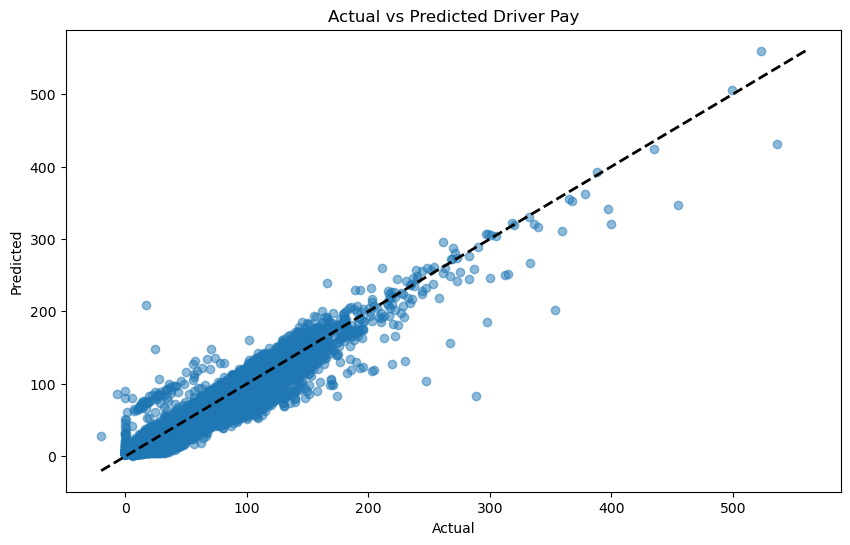

In [51]:
# Regression model to predict driver_pay
# Define the features and target
features = ['base_passenger_fare', 'trip_miles', 'trip_time', 'tolls', 'congestion_surcharge', 'tips']
target = 'driver_pay'

# Filter the DataFrame to include only selected features and target
data = numeric_df[features + [target]]

# Drop rows with missing values (if any)
data = data.dropna()

# Define the feature matrix (X) and target vector (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
sample_size = len(y_test)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')
print(f'Sample Size: {sample_size}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Shorten the center line to fit the actual vs. predicted values range
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Driver Pay')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'actual_vs_predicted_driver_pay.png'))

# Display the plot
plt.show()

In [52]:
# Predicted values closely align with actual values.
# Slight deviations observed at higher values of driver pay.
# Scatter plot shows strong alignment with the diagonal reference line, indicating accurate predictions.

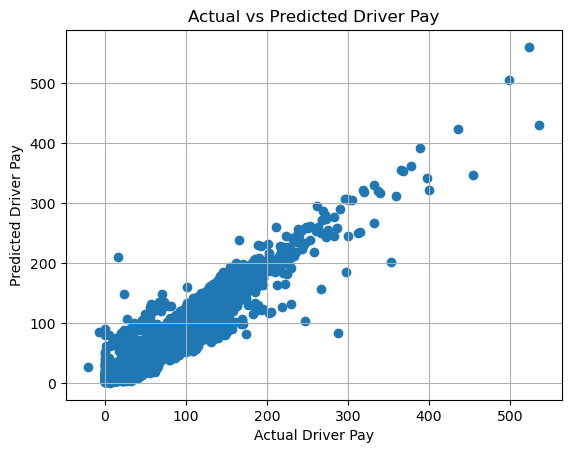

In [53]:
# Scatter plot of Actual vs Predicted Driver Pay
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Driver Pay")
plt.ylabel("Predicted Driver Pay")
plt.grid()
plt.title("Actual vs Predicted Driver Pay")

# Save the plot 
plt.savefig(os.path.join(image_dir, "actual_vs_predicted_driver_pay.png"))

# Display the plot
plt.show()

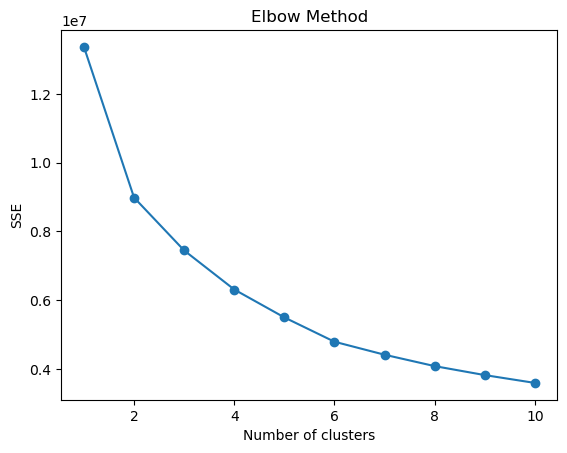

In [54]:
# K-Means Clustering- to identify patterns & group similar trips together
features = ['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips']
data = df[features].dropna()
scaled_data = StandardScaler().fit_transform(data)

# Elbow method to determine optimal number of clusters
sse = [KMeans(n_clusters=k, random_state=42).fit(scaled_data).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')

# Save the plot 
plt.savefig(os.path.join(image_dir, 'elbow_method_kmeans.png'))

# Display the plot
plt.show()

In [55]:
# The optimal value of k = 4 based on the Elbow Method analysis.
# The trips can be effectively grouped into 4 clusters, capturing the primary patterns in the data with minimal loss in accuracy.

In [56]:
data.columns

Index(['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips'],
      dtype='object')

In [57]:
# Define the features to match the number used in clustering
features = ['trip_miles', 'trip_time', 'base_passenger_fare', 'driver_pay', 'tolls', 'bcf', 'congestion_surcharge', 'tips']
X = numeric_df[features]

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Analyze the cluster centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("Cluster Centroids:\n", centroids)

Cluster Centroids:
    trip_miles    trip_time  base_passenger_fare  driver_pay     tolls  \
0    1.921587   588.755912            13.295721    9.681915  0.090799   
1   11.474340  2337.047508            48.236044   39.703730  3.630256   
2    5.430644  1316.251512            27.043666   21.227817  1.089004   
3   21.456766  4137.988842            88.869142   73.369569  6.887863   

        bcf  congestion_surcharge      tips  
0  0.386300              0.920002  0.555732  
1  1.505142              1.414767  2.398147  
2  0.813280              1.284821  1.122060  
3  2.777564              1.440283  4.859720  


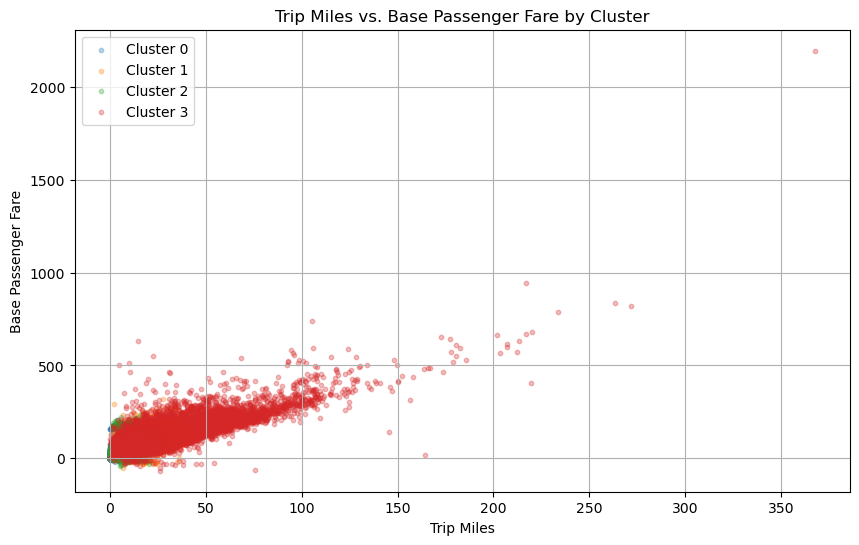

In [58]:
# Plot Trip Miles vs. Base Passenger Fare
plt.figure(figsize=(10, 6))
for cluster in range(4):
    subset = numeric_df[data['Cluster'] == cluster]
    plt.scatter(subset['trip_miles'], subset['base_passenger_fare'], 
                label=f'Cluster {cluster}', 
                alpha=0.3, s=10)  

plt.xlabel('Trip Miles')
plt.ylabel('Base Passenger Fare')
plt.title('Trip Miles vs. Base Passenger Fare by Cluster')
plt.legend()
plt.grid(True)

# Save the plot 
plt.savefig(os.path.join(image_dir, 'trip_miles_vs_base_fare.png'))

# Display the plot
plt.show()

In [59]:
# Majority of trips are short and inexpensive, with a distinct group (Cluster 3) capturing the rare long, high base passenger fare trips.
# Significant overlap between the clusters indicates that most trips are similar in short distance and low fare.

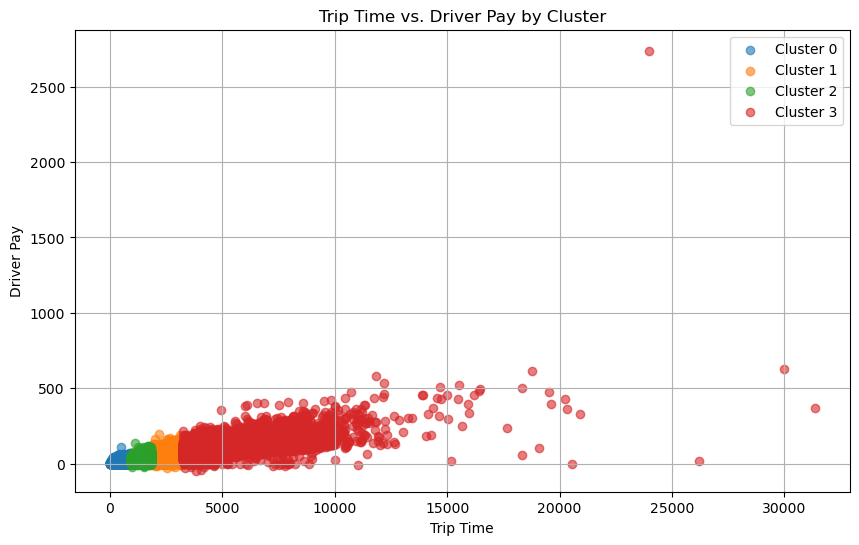

In [60]:
# Plot Trip Time vs. Driver Pay
plt.figure(figsize=(10, 6))
for cluster in range(4):
    subset = numeric_df[data['Cluster'] == cluster]
    plt.scatter(subset['trip_time'], subset['driver_pay'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Trip Time')
plt.ylabel('Driver Pay')
plt.title('Trip Time vs. Driver Pay by Cluster')
plt.legend()
plt.grid(True)

# Save the plot 
plt.savefig(os.path.join(image_dir, 'trip_time_vs_driver_pay.png'))

# Display the plot
plt.show()

In [61]:
# Most trips are short in duration and result in lower driver pay, with Cluster 3 capturing the longer, more lucrative trips.
# Clusters 0, 1, 2 overlap indicating similar trip durations and pay within these groups.
# Cluster 3 shows wide range in trip time.

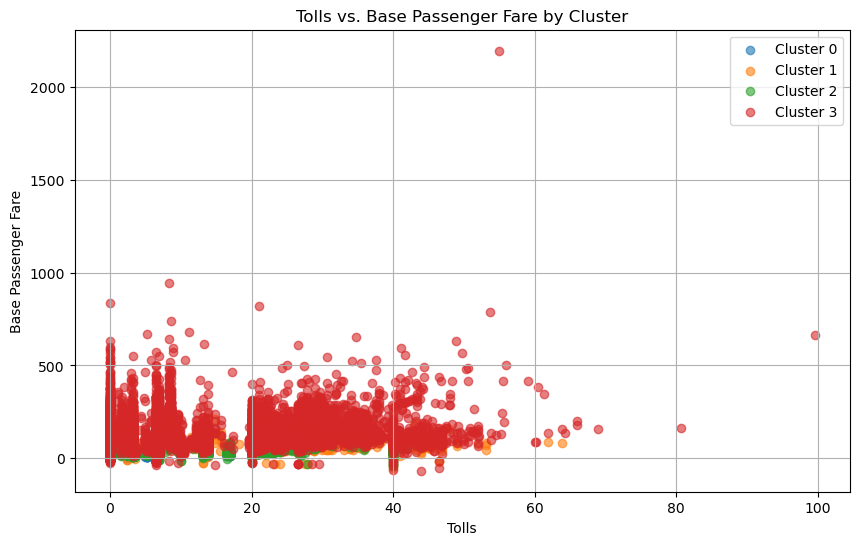

In [62]:
# Plot Tolls vs. Base Passenger Fare
plt.figure(figsize=(10, 6))
for cluster in range(4):
    subset = numeric_df[data['Cluster'] == cluster]
    plt.scatter(subset['tolls'], subset['base_passenger_fare'], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('Tolls')
plt.ylabel('Base Passenger Fare')
plt.title('Tolls vs. Base Passenger Fare by Cluster')
plt.legend()
plt.grid(True)

# Save the plot 
plt.savefig(os.path.join(image_dir, 'tolls_vs_base_fare.png'))

# Display the plot
plt.show()

In [63]:
# Higher tolls are associated with higher base fares, particularly in Cluster 3, which captures the more costly trips.
# Cluster 3 dominates the plot representing long-distance or premium routes with higher tolls.
# Clusters 0, 1, 2 overlap significantly and likely include shorter and more common trips with minimal toll charges.

In [64]:
cluster_3 = data[data["Cluster"] == 3]

In [65]:
cluster_3.describe()

,trip_miles,trip_time,base_passenger_fare,tolls,sales_tax,congestion_surcharge,airport_fee,tips,Cluster
count,53751.000000,53751.000000,53751.000000,53751.000000,53751.000000,53751.000000,53751.000000,53751.000000,53751.0
mean,21.451123,4136.833696,88.844485,6.884568,5.972992,1.440224,1.100933,4.857923,3.0
std,14.112514,1019.531300,50.274643,8.860088,4.403440,1.363983,1.250576,9.580092,0.0
min,0.000000,3235.000000,-66.970000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,13.310000,3486.000000,58.370000,0.000000,3.830000,0.000000,0.000000,0.000000,3.0
50%,18.030000,3841.000000,74.740000,6.550000,5.960000,2.750000,0.000000,0.000000,3.0
75%,24.520000,4446.000000,105.090000,6.940000,7.970000,2.750000,2.500000,7.380000,3.0
max,367.450000,31338.000000,2193.960000,99.570000,74.530000,5.500000,5.000000,147.420000,3.0


In [66]:
stats = data.groupby("Cluster").agg(["mean", "std","count"])

In [67]:
stats

trip_miles                       trip_time                       \
              mean        std   count         mean          std   count   
Cluster                                                                   
0         1.923196   1.255082  822633   589.000975   207.375005  822633   
1        11.474248   6.267604  237307  2336.955412   379.214012  237307   
2         5.431968   3.229008  556662  1316.687121   244.807428  556662   
3        21.451123  14.112514   53751  4136.833696  1019.531300   53751   

        base_passenger_fare                        tolls  ... sales_tax  \
                       mean        std   count      mean  ...     count   
Cluster                                                   ...             
0                 13.302012   5.911538  822633  0.091158  ...    822633   
1                 48.234629  21.290906  237307  3.630832  ...    237307   
2                 27.049030  11.104032  556662  1.089498  ...    556662   
3                 88.844485  50.274643   53751  6.884568  ...     53751   

        congestion_surcharge                   airport_fee                    \
                        mean       std   count        mean       std   count   
Cluster                                                                        
0                   0.920279  1.293277  822633    0.041106  0.313337  822633   
1                   1.414826  1.363848  237307    0.603190  1.075713  237307   
2                   1.284771  1.364948  556662    0.184580  0.657620  556662   
3                   1.440224  1.363983   53751    1.100933  1.250576   53751   

             tips                    
             mean       std   count  
Cluster                              
0        0.555959  1.471727  822633  
1        2.397966  5.050102  237307  
2        1.122416  2.680018  556662  
3        4.857923  9.580092   53751  

[4 rows x 24 columns]

In [68]:
idx = pd.IndexSlice

In [69]:
idx

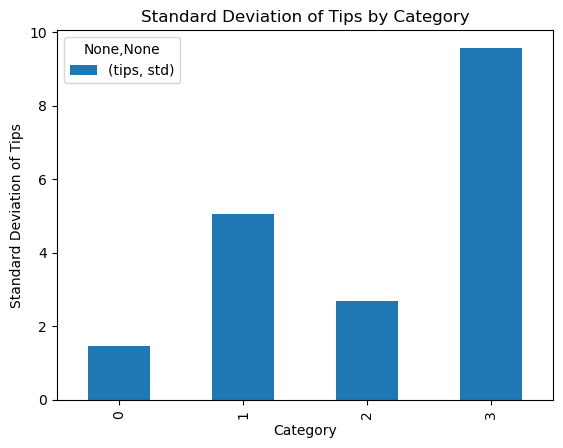

In [70]:
# Bar plot
stats.loc[:, idx["tips":, "std"]].plot(kind="bar")

# Set titles and labels 
plt.xlabel("Category")
plt.ylabel("Standard Deviation of Tips")
plt.title("Standard Deviation of Tips by Category")

# Save the plot to a file
plt.savefig(os.path.join(image_dir, "tips_std_bar_plot.png"))

# Display the plot
plt.show()